<a href="https://colab.research.google.com/github/unni2888/CognoRise-Infotech/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [163]:
df = pd.read_csv('house_price.csv')

In [164]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [166]:
df['waterfront'].value_counts()

waterfront
0    4567
1      33
Name: count, dtype: int64

In [167]:
df['view'].value_counts()

view
0    4140
2     205
3     116
4      70
1      69
Name: count, dtype: int64

In [168]:
df['condition'].value_counts()

condition
3    2875
4    1252
5     435
2      32
1       6
Name: count, dtype: int64

In [169]:
df['street'].value_counts()

street
2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: count, Length: 4525, dtype: int64

In [170]:
df['city'].value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

In [171]:
df['statezip'].value_counts()

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

In [172]:
df['country'].value_counts()

country
USA    4600
Name: count, dtype: int64

In [173]:
df.drop(['statezip', 'street', 'date', 'country', 'yr_built', 'yr_renovated'], axis = 1, inplace = True)

In [174]:
df[df.duplicated()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  city           4600 non-null   object 
dtypes: float64(4), int64(7), object(1)
memory usage: 431.4+ KB


In [176]:
df['city'] = df['city'].astype('category')

In [177]:
df['city'] = LabelEncoder().fit_transform(df['city'])

In [178]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,36
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,35
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,18
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,3
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,31


<Axes: >

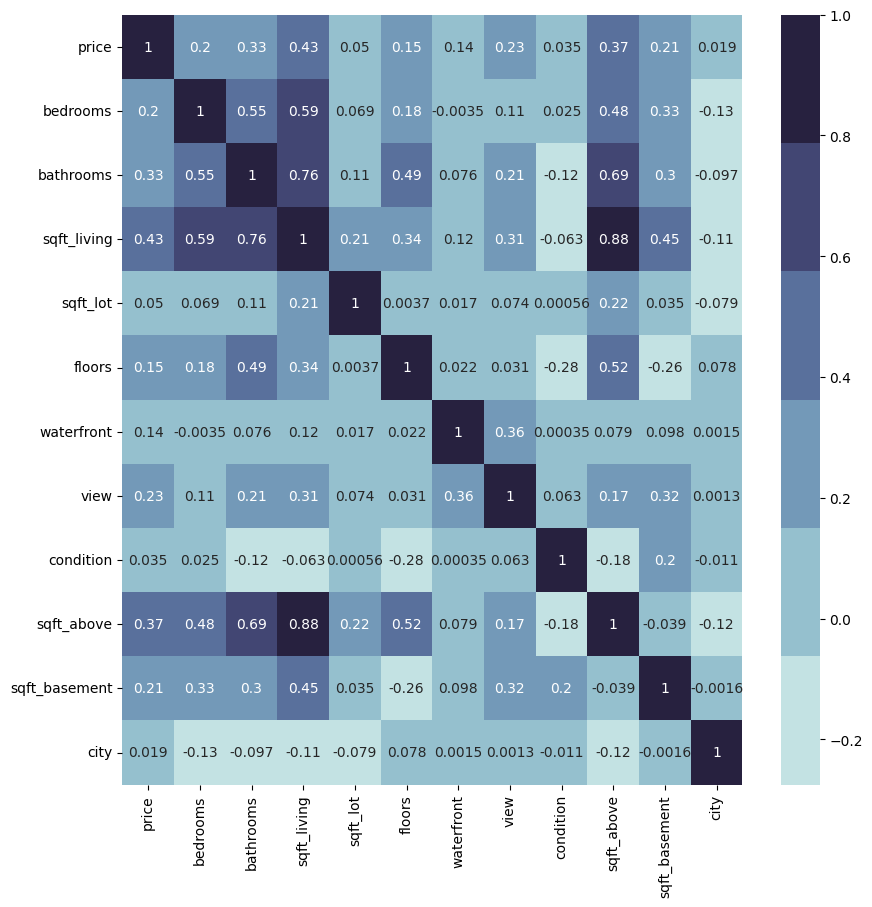

In [179]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap = sns.color_palette("ch:start=.2,rot=-.3"))

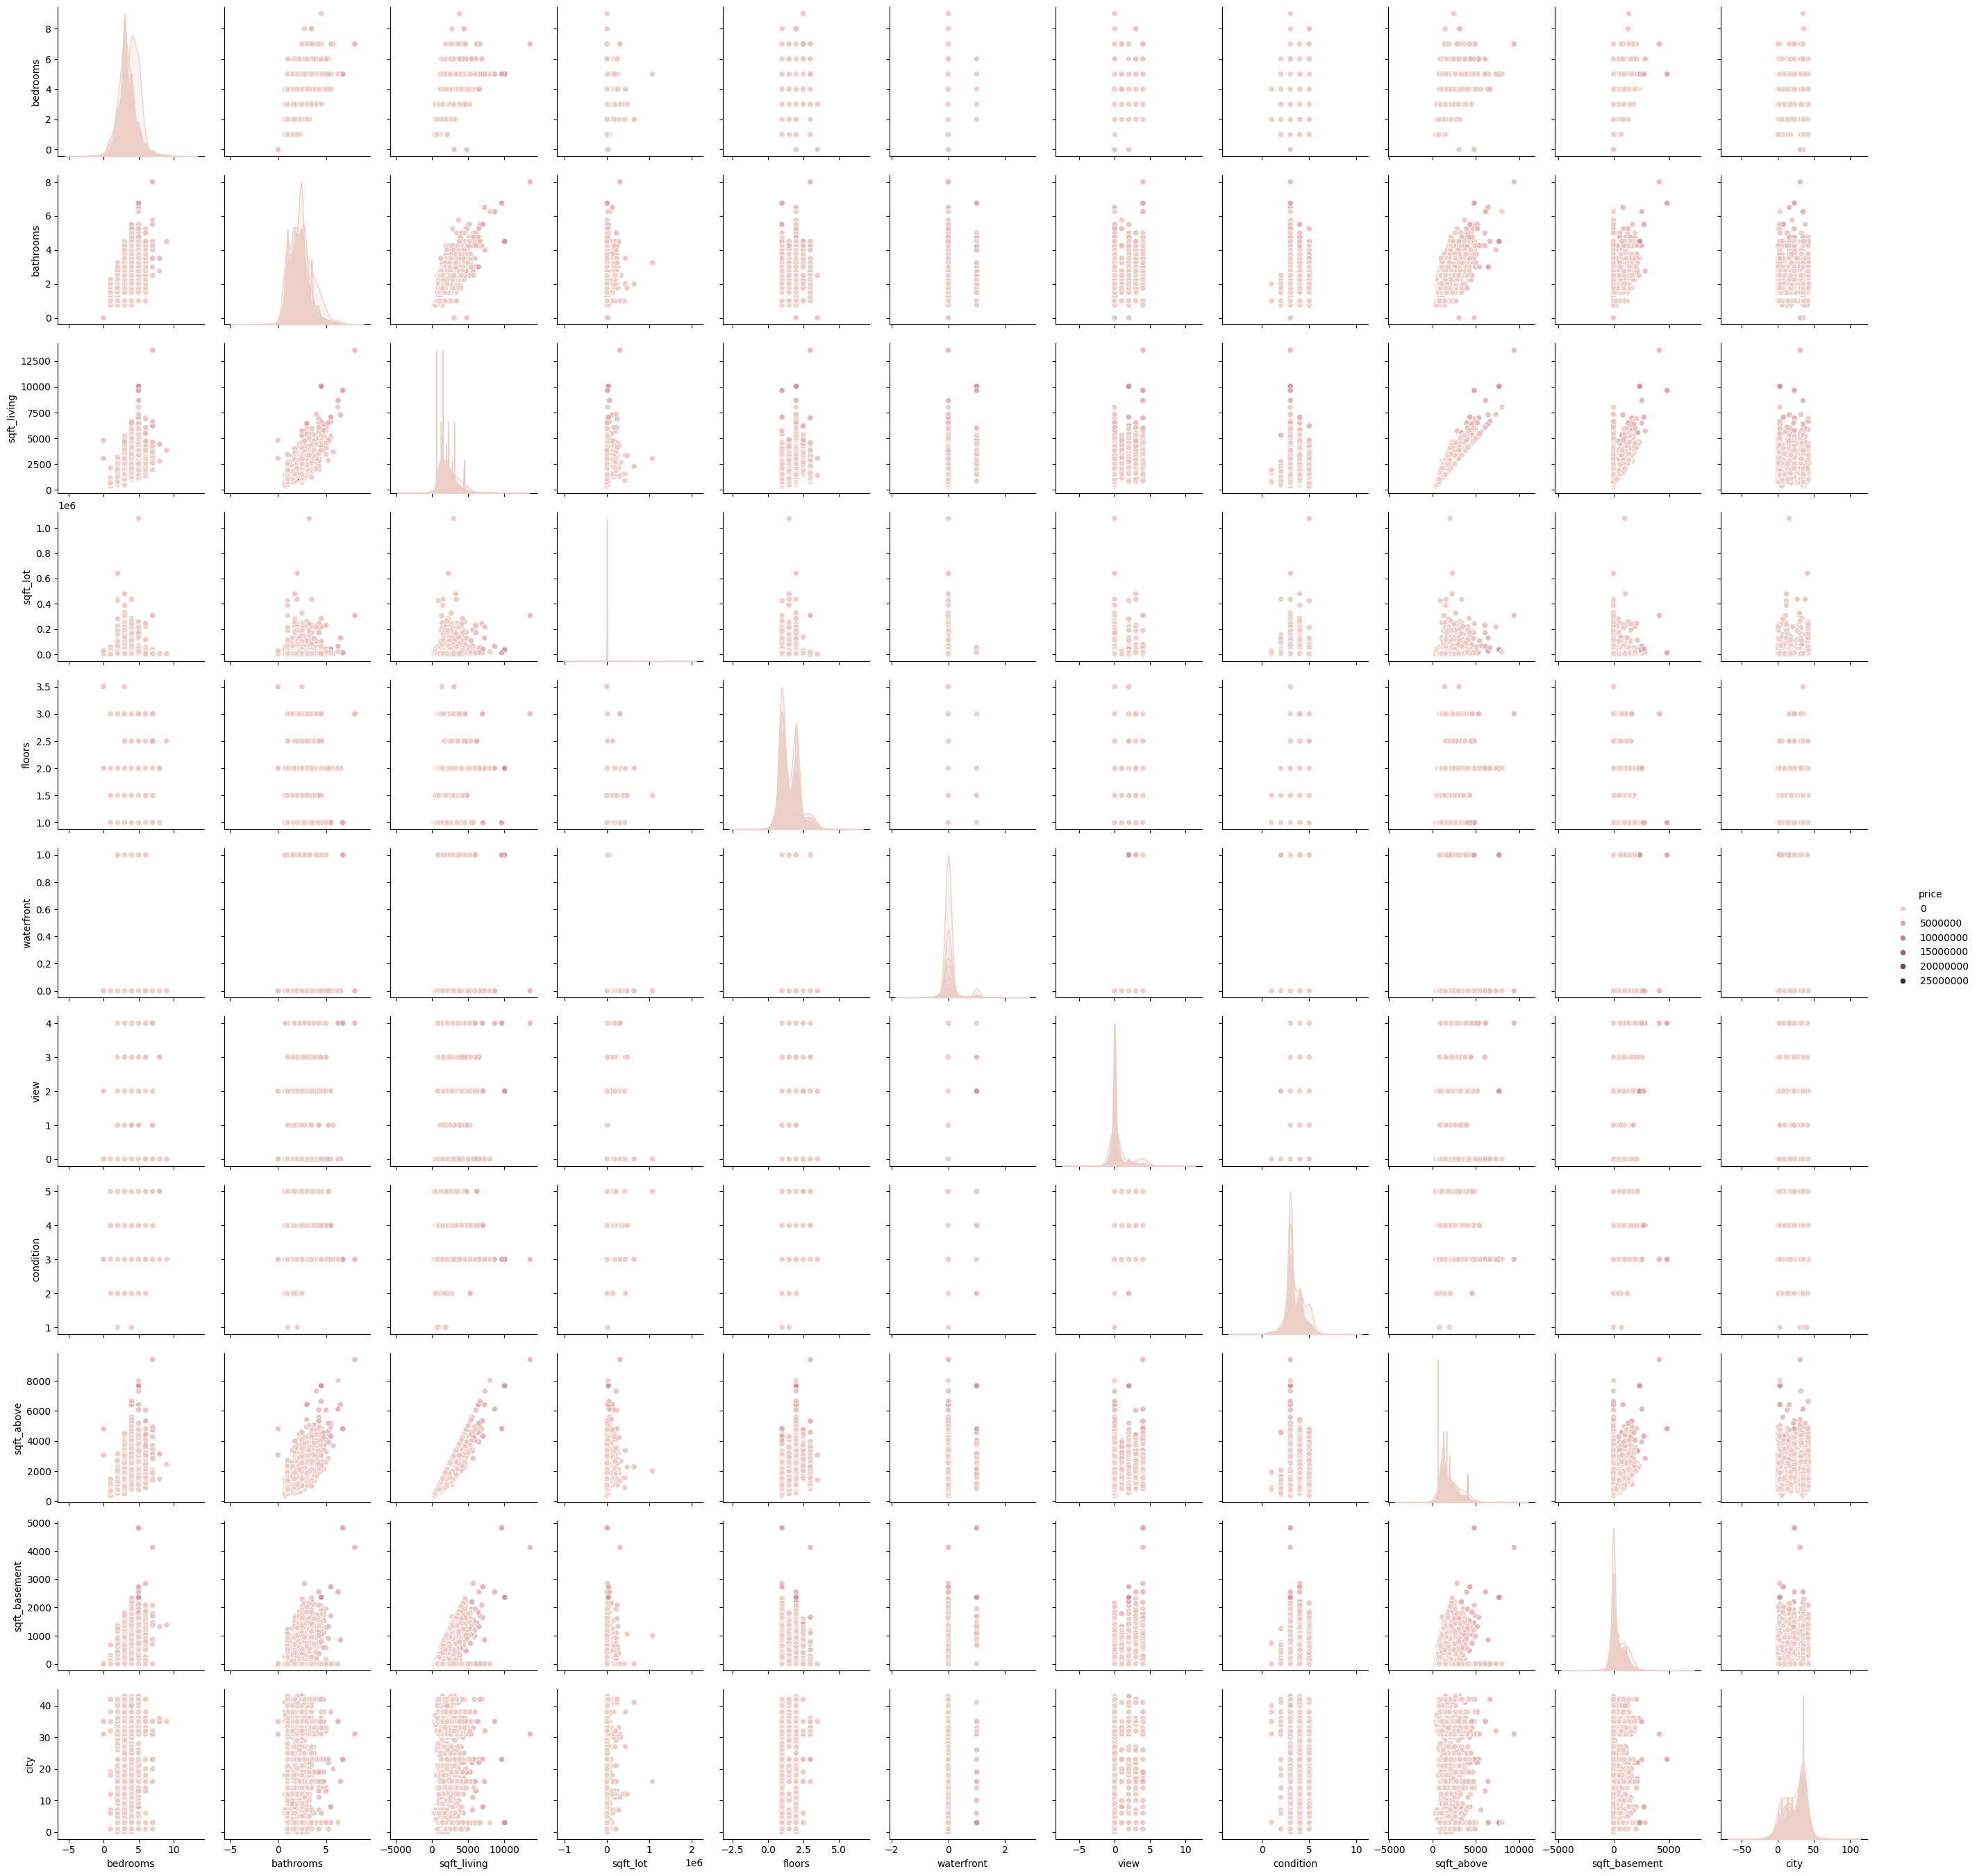

In [83]:
sns.pairplot(df, hue = 'price', palette = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True))

## Outlier Handling (Isolation Forest)

In [180]:
IsoFor = IsolationForest(contamination = 0.01)

In [181]:
IsoFor.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01)

In [182]:
IsoFor.predict(df)

array([1, 1, 1, ..., 1, 1, 1])

In [183]:
df['Anomaly'] = IsoFor.predict(df)

In [184]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,Anomaly
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,36,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,35,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,18,1
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,3,1
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,31,1


In [185]:
df[df['Anomaly'] == -1]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,Anomaly
122,2280000.0,7.0,8.00,13540,307752,3.0,0,4,3,9410,4130,31,-1
252,3200000.0,7.0,4.50,6210,8856,2.5,0,2,5,4760,1450,35,-1
414,1370000.0,4.0,2.75,3720,9450,1.0,0,4,5,1960,1760,3,-1
462,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,16,-1
495,950000.0,5.0,3.00,4530,258746,1.5,0,0,4,3200,1330,42,-1
581,2555000.0,4.0,2.50,5300,26211,2.0,1,2,2,4570,730,35,-1
634,740000.0,5.0,5.00,5774,31675,1.0,0,2,3,4490,1284,14,-1
839,2000000.0,5.0,4.25,6490,10862,2.0,0,3,4,3940,2550,23,-1
1132,2700000.0,5.0,4.75,5305,8401,2.0,0,2,3,3745,1560,19,-1
1182,1150000.0,6.0,4.50,6040,219542,2.0,0,0,3,4100,1940,16,-1


## Deleting Outliers

In [186]:
df.drop(df[df['Anomaly'] == -1].index, axis = 0, inplace = True )

In [187]:
df[df['Anomaly'] == -1]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,Anomaly


In [188]:
df.drop('Anomaly', axis = 1, inplace = True)

# Normalizing the Data

In [189]:
df = MinMaxScaler().fit_transform(df)
df = pd.DataFrame(df, columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',	'condition', 'sqft_above', 'sqft_basement', 'city'])

In [190]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city
0,0.011771,0.333333,0.24,0.126797,0.006775,0.2,0.0,0.0,0.50,0.126797,0.000000,0.837209
1,0.089658,0.555556,0.40,0.428758,0.007835,0.4,0.0,1.0,1.00,0.392157,0.120172,0.813953
2,0.012862,0.333333,0.32,0.203922,0.010534,0.0,0.0,0.0,0.75,0.203922,0.000000,0.418605
3,0.015795,0.333333,0.36,0.213072,0.006885,0.0,0.0,0.0,0.75,0.082353,0.429185,0.069767
4,0.020684,0.444444,0.40,0.205229,0.009186,0.0,0.0,0.0,0.75,0.100654,0.343348,0.720930


# X and y Split

In [191]:
X = df.drop('price', axis = 1)
y = df['price']

# Train-Test Split

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Model Building

## Linear Regression

In [250]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

In [251]:
mean_squared_error(y_train, LinReg.predict(X_train))

0.0004082530741649625

In [253]:
r2_score(y_train, LinReg.predict(X_train))

0.13039157934320622

In [252]:
round(mean_squared_error(y_test, LinReg.predict(X_test)), 4)

0.0001

In [254]:
r2_score(y_test, LinReg.predict(X_test))

0.44725119660669876

# Feature Selection (Recursive Feature Elimination(RFE))

In [255]:
rfe_fit = RFE(estimator = LinearRegression()).fit(X_train, y_train)

In [256]:
rfe_fit.support_

array([ True,  True,  True,  True, False, False,  True, False, False,
       False, False])

In [257]:
rfe_fit.ranking_

array([1, 1, 1, 1, 7, 6, 1, 2, 3, 4, 5])

In [258]:
rfe_dict = dict(zip(X.columns, rfe_fit.ranking_))
rfe_dict = sorted(rfe_dict.items(), key = lambda x: x[1])
rfe_dict = pd.DataFrame(rfe_dict, columns = ['Feature', 'Ranking'])

In [259]:
rfe_dict

,Feature,Ranking
0,bedrooms,1
1,bathrooms,1
2,sqft_living,1
3,sqft_lot,1
4,view,1
5,condition,2
6,sqft_above,3
7,sqft_basement,4
8,city,5
9,waterfront,6


In [260]:
rfe_dict = rfe_dict.iloc[:5,:]
rfe_dict

,Feature,Ranking
0,bedrooms,1
1,bathrooms,1
2,sqft_living,1
3,sqft_lot,1
4,view,1


In [261]:
X_train_selected = X_train[rfe_dict['Feature']]
X_test_selected = X_test[rfe_dict['Feature']]

In [262]:
X_train_selected.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,view
3955,0.333333,0.24,0.166013,0.006133,0.0
3829,0.222222,0.16,0.122876,0.006045,0.0
3285,0.444444,0.44,0.322876,0.003132,0.0
3665,0.444444,0.40,0.389542,0.042950,0.0
2155,0.444444,0.56,0.261438,0.002845,0.0


## Linear Regression with Selected Features

In [263]:
LinReg_model_2 = LinearRegression()
LinReg_model_2.fit(X_train_selected, y_train)

LinearRegression()

In [264]:
mean_squared_error(y_train, LinReg_model_2.predict(X_train_selected))

0.00041124503297333047

In [265]:
r2_score(y_train, LinReg_model_2.predict(X_train_selected))

0.12401849181817814

In [266]:
mean_squared_error(y_test, LinReg_model_2.predict(X_test_selected))

7.25337100957401e-05

In [267]:
r2_score(y_test, LinReg_model_2.predict(X_test_selected))

0.414751428378775

## Decision Tree Regressor

In [268]:
DT = DecisionTreeRegressor()
DT.fit(X_train_selected, y_train)

DecisionTreeRegressor()

In [269]:
mean_squared_error(y_train, DT.predict(X_train_selected))

2.5425431720693094e-09

In [270]:
r2_score(y_train, DT.predict(X_train_selected))

0.9999945842001146

In [241]:
mean_squared_error(y_test, DT.predict(X_test_selected))

0.00015289329891350717

In [271]:
r2_score(y_test, DT.predict(X_test_selected))

-0.3054026788250237

In [277]:
DT.feature_importances_

array([0.02935058, 0.09936668, 0.17308283, 0.68386962, 0.0143303 ])

In [278]:
feature = pd.DataFrame(DT.feature_importances_, index = X_train_selected.columns, columns = ['Importance'])

In [280]:
feature.sort_values(by = 'Importance', ascending = False)

,Importance
sqft_lot,0.683870
sqft_living,0.173083
bathrooms,0.099367
bedrooms,0.029351
view,0.014330


## Random Forest Regressor

In [272]:
rf = RandomForestRegressor()
rf.fit(X_train_selected, y_train)

RandomForestRegressor()

In [273]:
mean_squared_error(y_train, rf.predict(X_train_selected))

7.035548730709242e-05

In [274]:
r2_score(y_train, rf.predict(X_train_selected))

0.8501377501521566

In [275]:
mean_squared_error(y_test, rf.predict(X_test_selected))

0.0004678133481457531

In [276]:
r2_score(y_test, rf.predict(X_test_selected))

-2.7746186349252304

## Gradient Boosting Regressor

In [282]:
GB = GradientBoostingRegressor()
GB.fit(X_train_selected, y_train)

GradientBoostingRegressor()

In [284]:
mean_squared_error(y_train, GB.predict(X_train_selected))

9.407621320271289e-05

In [285]:
r2_score(y_train, GB.predict(X_train_selected))

0.7996108973535218

In [286]:
mean_squared_error(y_test, GB.predict(X_test_selected))

8.813018504393135e-05

In [287]:
r2_score(y_test, GB.predict(X_test_selected))

0.2889090486948047